In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Use when preprocessing is different for different subsets of columns
# If applying same thing to every feature (ie all numeric and want to scale)
# ColumnTransformer is overkill, but could be used to future-proof.
# from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# fmt: off

# Some fake data
test_grade = [90, 100, 85, 93, 88, 100, 
              97, 92, 89, 84, 55, 65, 75, 
              58, 69, 71, 72, 63, 70, 59]

project_grade = [100, 85, 98, 88, 87, 99, 
                 99, 86, 89, 100, 67, 71,
                 74, 73, 55, 59, 56, 72, 67, 72]

pass_fail = ["pass", "pass", "pass", "pass", "pass",
             "pass", "pass", "pass", "pass", "pass",
             "fail", "fail", "fail", "fail", "fail",
             "fail", "fail", "fail", "fail", "fail"]
# fmt: on

<IPython.core.display.Javascript object>

Create a dataframe using the 3 lists above as the columns.

In [3]:
df = pd.DataFrame(
    {"test_grades": test_grade, "project_grades": project_grade, "pass_fail": pass_fail}
)

df["pass"] = (df["pass_fail"] == "pass").astype(int)
df = df.drop(columns=["pass_fail"])
df.head()

,test_grades,project_grades,pass
0,90,100,1
1,100,85,1
2,85,98,1
3,93,88,1
4,88,87,1


<IPython.core.display.Javascript object>

Make a scatter plot of test scores by project scores and color by whether the record passed or failed.

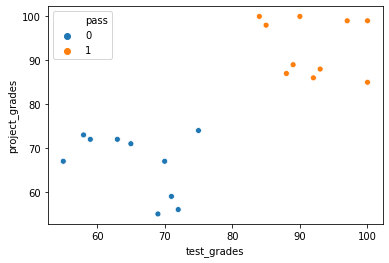

<IPython.core.display.Javascript object>

In [4]:
sns.scatterplot("test_grades", "project_grades", hue="pass", data=df)
plt.show()

Look at the documenation for `SVC` which has already been loaded using `from sklearn.svm import SVC`.

In [5]:
# SVC?

<IPython.core.display.Javascript object>

Use the documentation to fit an `SVC` model with a kernel type of `'linear'`.  No need to do a train/test split.  The target variable should be the pass/fail column.

In [6]:
X = df.drop(columns=["pass"])
y = df["pass"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<IPython.core.display.Javascript object>

In [26]:
# fmt: off
pipeline = Pipeline([
    ("svm", SVC(kernel="linear"))
])
# fmt:on

grid = {"svm__C": [1.0, 5.0, 10.0, 50.0]}

pipeline_cv = GridSearchCV(pipeline, grid, verbose=1)

pipeline_cv.fit(X_train, y_train)
pipeline_cv.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


{'svm__C': 1.0}

<IPython.core.display.Javascript object>

In [27]:
pipeline_cv.cv_results_["mean_test_score"]

array([1., 1., 1., 1.])

<IPython.core.display.Javascript object>

Use the documentation of `plot_decision_regions` to plot the decision boundary of the `SVC` classifier.  The `plot_decision_regions` function was imported with the line: `from mlxtend.plotting import plot_decision_regions`.

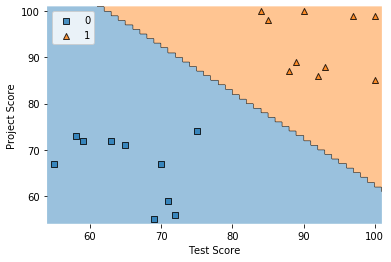

<IPython.core.display.Javascript object>

In [28]:
plot_decision_regions(np.array(X), np.array(y), pipeline_cv)

# These axes labels might be different depending
# on how you built the dataframe, and the order of columns in it
plt.xlabel("Test Score")
plt.ylabel("Project Score")
plt.legend(loc="upper left")
plt.show()

Create a dataframe with new records to classify.

* For the 1st record, use 90 as the test score and 73 as the project score.
* For the 2nd record, use 90 as the test score and 72 as the project score.

Make predictions of pass/fail for both of these records and add a column to the dataframe to hold these predictions. Call this column the same thing as the y column in your original dataframe.

In [46]:
new_records = pd.DataFrame({"test_grades": [90, 90], "project_grades": [73, 71.5]})
new_records["pass"] = pipeline_cv.predict(new_records)
new_records

,test_grades,project_grades,pass
0,90,73.0,1
1,90,71.5,0


<IPython.core.display.Javascript object>

Combine this dataframe with the original one and replot the decision boundary with these 2 points included.

In [47]:
new_df = df.append(new_records, sort=False)
new_X = new_df[["test_grades", "project_grades"]].values
new_y = new_df["pass"].values

<IPython.core.display.Javascript object>

Re-plot the decision boundary and include these 2 new points.

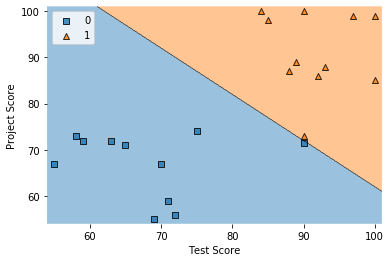

<IPython.core.display.Javascript object>

In [48]:
plot_decision_regions(new_X, new_y, pipeline_cv)

# These axes labels might be different depending
# on how you built the dataframe, and the order of columns in it
plt.xlabel("Test Score")
plt.ylabel("Project Score")
plt.legend(loc="upper left")
plt.show()

In [57]:
# View coefficients
model = pipeline_cv.best_estimator_
model["svm"].coef_

array([[0.07692308, 0.07692308]])

<IPython.core.display.Javascript object>